In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df=pd.read_csv("D:\\owid-covid-data.csv\\owid-covid-data.csv")
print(df.head())

  iso_code continent     location        date  total_cases  new_cases  \
0      AFG      Asia  Afghanistan  2020-02-24          5.0        5.0   
1      AFG      Asia  Afghanistan  2020-02-25          5.0        0.0   
2      AFG      Asia  Afghanistan  2020-02-26          5.0        0.0   
3      AFG      Asia  Afghanistan  2020-02-27          5.0        0.0   
4      AFG      Asia  Afghanistan  2020-02-28          5.0        0.0   

   new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
0                 NaN           NaN         NaN                  NaN  ...   
1                 NaN           NaN         NaN                  NaN  ...   
2                 NaN           NaN         NaN                  NaN  ...   
3                 NaN           NaN         NaN                  NaN  ...   
4                 NaN           NaN         NaN                  NaN  ...   

   female_smokers  male_smokers  handwashing_facilities  \
0             NaN           NaN        

In [8]:
df.tail()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
166321,ZWE,Africa,Zimbabwe,2022-03-01,236871.0,491.0,413.000,5395.0,0.0,1.000,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
166322,ZWE,Africa,Zimbabwe,2022-03-02,237503.0,632.0,416.286,5396.0,1.0,1.143,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
166323,ZWE,Africa,Zimbabwe,2022-03-03,237503.0,0.0,362.286,5396.0,0.0,0.857,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
166324,ZWE,Africa,Zimbabwe,2022-03-04,238739.0,1236.0,467.429,5397.0,1.0,0.714,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
166325,ZWE,Africa,Zimbabwe,2022-03-05,239019.0,280.0,459.429,5397.0,0.0,0.571,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN


The dataset has data alphabetically arranged for all countries from afghanistan to zimbabwe
we will be looking at India specifically.
Dataset has about 67 fields as attribute some of which are general info about the country like ISO_code,continent and location these fields don't affect the data directly.
Also from the head and tail we can gather that this data ranges from about feb 2020 to mar 2022

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166326 entries, 0 to 166325
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    166326 non-null  object 
 1   continent                                   156370 non-null  object 
 2   location                                    166326 non-null  object 
 3   date                                        166326 non-null  object 
 4   total_cases                                 163293 non-null  float64
 5   new_cases                                   163133 non-null  float64
 6   new_cases_smoothed                          161150 non-null  float64
 7   total_deaths                                145451 non-null  float64
 8   new_deaths                                  145487 non-null  float64
 9   new_deaths_smoothed                         143390 non-null  float64
 

The dataset is quite uneven as we can see that the first column i.e. iso_code has about 1,66,326 values that is the maximum and some columns have data only for 5400 to 5600 rows. Further analysis is required for these columns.
This also shows that data for these attributes o fields could not be gathered properly for certain countries.

In [13]:
df.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
count,1.632930e+05,1.631330e+05,1.611500e+05,1.454510e+05,145487.000000,143390.000000,162535.000000,162375.000000,160398.000000,144706.000000,...,106050.000000,104595.000000,68569.000000,123664.000000,155268.000000,136253.000000,5.696000e+03,5696.000000,5696.000000,5696.000000
mean,2.536044e+06,1.157084e+04,1.156560e+04,5.766407e+04,171.137304,172.673031,29447.756785,166.431538,165.507110,509.384956,...,10.627229,32.778221,50.788710,3.027816,73.576309,0.725587,3.761302e+04,9.404336,15.967077,972.197816
std,1.543441e+07,8.442598e+04,8.257830e+04,3.021145e+05,832.251328,817.024076,51852.379656,683.021740,532.174029,784.551311,...,10.558306,13.523688,31.811788,2.450110,7.491615,0.149964,1.043065e+05,16.439173,30.092830,1420.342295
min,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000,0.000000,0.001000,0.000000,0.000000,0.000000,...,0.100000,7.700000,1.188000,0.100000,53.280000,0.394000,-3.772610e+04,-28.450000,-95.920000,-1826.595723
25%,2.001000e+03,1.000000e+00,7.000000e+00,7.900000e+01,0.000000,0.143000,623.579000,0.042000,1.630000,18.580250,...,1.900000,21.600000,19.351000,1.300000,69.500000,0.602000,-7.515000e+01,-0.722500,-0.752500,-29.788442
50%,2.611700e+04,7.900000e+01,1.071430e+02,7.830000e+02,2.000000,2.429000,4731.521000,11.439000,18.829000,127.737500,...,6.300000,31.400000,49.839000,2.400000,75.050000,0.743000,3.424600e+03,6.065000,7.195000,473.393182
75%,2.987020e+05,1.063000e+03,1.146000e+03,7.307000e+03,20.000000,21.286000,37724.466000,101.289500,120.859750,711.954750,...,19.300000,41.300000,83.241000,4.000000,78.930000,0.845000,2.478462e+04,14.520000,22.997500,1656.361067
max,4.451295e+08,4.206334e+06,3.444237e+06,5.995245e+06,18020.000000,14689.143000,706541.904000,51427.491000,16052.608000,6322.263000,...,44.000000,78.100000,100.000000,13.800000,86.750000,0.957000,1.080748e+06,111.010000,374.930000,9153.060433


Few things that can noted from the statistical data is that:- For these 2 years,for a million people, about 3% of the world's population was covid positive at any point of time(gathered that from the mean) and there were certain moments where about 70% of worlds population was coming out to be covid +ve for a million people.(gathered from max of total cases per million). for the same field standard deviation is quite high as compared to mean by that we can infer that the total +ve cases through were scattered throughout the world for some countries the cases were low and for some extremely high.

Let us find out how many countries are considered in the given dataset

In [21]:
print(df.location.unique())

['Afghanistan' 'Africa' 'Albania' 'Algeria' 'Andorra' 'Angola' 'Anguilla'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba' 'Asia' 'Australia'
 'Austria' 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados'
 'Belarus' 'Belgium' 'Belize' 'Benin' 'Bermuda' 'Bhutan' 'Bolivia'
 'Bonaire Sint Eustatius and Saba' 'Bosnia and Herzegovina' 'Botswana'
 'Brazil' 'British Virgin Islands' 'Brunei' 'Bulgaria' 'Burkina Faso'
 'Burundi' 'Cambodia' 'Cameroon' 'Canada' 'Cape Verde' 'Cayman Islands'
 'Central African Republic' 'Chad' 'Chile' 'China' 'Colombia' 'Comoros'
 'Congo' 'Cook Islands' 'Costa Rica' "Cote d'Ivoire" 'Croatia' 'Cuba'
 'Curacao' 'Cyprus' 'Czechia' 'Democratic Republic of Congo' 'Denmark'
 'Djibouti' 'Dominica' 'Dominican Republic' 'Ecuador' 'Egypt'
 'El Salvador' 'Equatorial Guinea' 'Eritrea' 'Estonia' 'Eswatini'
 'Ethiopia' 'Europe' 'European Union' 'Faeroe Islands' 'Falkland Islands'
 'Fiji' 'Finland' 'France' 'French Polynesia' 'Gabon' 'Gambia' 'Georgia'
 'Germany' 'Ghana'

In [123]:
df.isnull().sum()

iso_code                                        0
continent                                    9956
location                                        0
date                                            0
total_cases                                  3033
                                            ...  
human_development_index                     30073
excess_mortality_cumulative_absolute       160630
excess_mortality_cumulative                160630
excess_mortality                           160630
excess_mortality_cumulative_per_million    160630
Length: 67, dtype: int64

In [25]:
print(len(pd.unique(df['location'])))

238


There are 238 countries mentioned in the dataset

# Data cleaning

In [29]:
df.loc[df['location'] == 'Upper middle income']

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
157996,OWID_UMC,NaN,Upper middle income,2020-01-22,551.0,0.0,NaN,17.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
157997,OWID_UMC,NaN,Upper middle income,2020-01-23,643.0,92.0,NaN,18.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
157998,OWID_UMC,NaN,Upper middle income,2020-01-24,921.0,278.0,NaN,26.0,8.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
157999,OWID_UMC,NaN,Upper middle income,2020-01-25,1409.0,488.0,NaN,42.0,16.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
158000,OWID_UMC,NaN,Upper middle income,2020-01-26,2074.0,665.0,NaN,56.0,14.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158765,OWID_UMC,NaN,Upper middle income,2022-03-01,118803663.0,310712.0,380225.857,2438871.0,2521.0,2960.286,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
158766,OWID_UMC,NaN,Upper middle income,2022-03-02,119086568.0,282905.0,344100.857,2441038.0,2167.0,2654.429,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
158767,OWID_UMC,NaN,Upper middle income,2022-03-03,119400821.0,314253.0,322055.857,2443647.0,2609.0,2532.857,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
158768,OWID_UMC,NaN,Upper middle income,2022-03-04,119707484.0,306663.0,304630.571,2446573.0,2926.0,2485.714,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
df.loc[df['location'] == 'Lower middle income']

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
89412,OWID_LMC,NaN,Lower middle income,2020-01-22,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
89413,OWID_LMC,NaN,Lower middle income,2020-01-23,2.0,2.0,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
89414,OWID_LMC,NaN,Lower middle income,2020-01-24,2.0,0.0,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
89415,OWID_LMC,NaN,Lower middle income,2020-01-25,3.0,1.0,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
89416,OWID_LMC,NaN,Lower middle income,2020-01-26,3.0,0.0,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90181,OWID_LMC,NaN,Lower middle income,2022-03-01,82370236.0,168663.0,185253.857,1277071.0,967.0,1223.571,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90182,OWID_LMC,NaN,Lower middle income,2022-03-02,82588333.0,218097.0,184383.286,1278122.0,1051.0,1144.143,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90183,OWID_LMC,NaN,Lower middle income,2022-03-03,82831855.0,243522.0,190485.857,1279010.0,888.0,1029.714,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90184,OWID_LMC,NaN,Lower middle income,2022-03-04,83051964.0,224094.0,198231.429,1280217.0,1207.0,1059.429,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
df.loc[df['location'] == 'Low income']

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
88670,OWID_LIC,NaN,Low income,2020-02-23,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
88671,OWID_LIC,NaN,Low income,2020-02-24,5.0,5.0,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
88672,OWID_LIC,NaN,Low income,2020-02-25,5.0,0.0,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
88673,OWID_LIC,NaN,Low income,2020-02-26,5.0,0.0,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
88674,OWID_LIC,NaN,Low income,2020-02-27,5.0,0.0,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89407,OWID_LIC,NaN,Low income,2022-03-01,1804283.0,557.0,557.429,41744.0,17.0,20.571,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
89408,OWID_LIC,NaN,Low income,2022-03-02,1804676.0,393.0,522.714,41763.0,19.0,20.143,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
89409,OWID_LIC,NaN,Low income,2022-03-03,1805220.0,544.0,520.286,41779.0,16.0,19.571,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
89410,OWID_LIC,NaN,Low income,2022-03-04,1805535.0,315.0,505.857,41790.0,11.0,19.857,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
df.loc[df['continent'].isna()]

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
741,OWID_AFR,NaN,Africa,2020-02-13,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
742,OWID_AFR,NaN,Africa,2020-02-14,1.0,1.0,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
743,OWID_AFR,NaN,Africa,2020-02-15,1.0,0.0,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
744,OWID_AFR,NaN,Africa,2020-02-16,1.0,0.0,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
745,OWID_AFR,NaN,Africa,2020-02-17,1.0,0.0,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164192,OWID_WRL,NaN,World,2022-03-01,438528632.0,1536867.0,1517307.571,5964706.0,8069.0,8308.286,...,6.434,34.635,60.13,2.705,72.58,0.737,NaN,NaN,NaN,NaN
164193,OWID_WRL,NaN,World,2022-03-02,440180084.0,1651452.0,1476155.000,5972651.0,7945.0,7771.000,...,6.434,34.635,60.13,2.705,72.58,0.737,NaN,NaN,NaN,NaN
164194,OWID_WRL,NaN,World,2022-03-03,442067549.0,1887465.0,1495014.857,5981034.0,8384.0,7435.143,...,6.434,34.635,60.13,2.705,72.58,0.737,NaN,NaN,NaN,NaN
164195,OWID_WRL,NaN,World,2022-03-04,443767689.0,1704138.0,1511060.286,5989802.0,8771.0,7391.000,...,6.434,34.635,60.13,2.705,72.58,0.737,NaN,NaN,NaN,NaN


The above rows are the rows that have NaN values for continent,these also include certain columns having countries as 'Upper middle income','low middle income' & 'low income' therefore these values affect the overall stats of the dataset hence we drop them.

In [36]:
df2 = df.drop(df[df.continent.isna()].index)

In [37]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 156370 entries, 0 to 166325
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    156370 non-null  object 
 1   continent                                   156370 non-null  object 
 2   location                                    156370 non-null  object 
 3   date                                        156370 non-null  object 
 4   total_cases                                 153344 non-null  float64
 5   new_cases                                   153177 non-null  float64
 6   new_cases_smoothed                          151272 non-null  float64
 7   total_deaths                                135708 non-null  float64
 8   new_deaths                                  135544 non-null  float64
 9   new_deaths_smoothed                         133525 non-null  float64
 

In [39]:
df2.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
count,1.533440e+05,1.531770e+05,151272.000000,135708.000000,135544.000000,133525.000000,153344.000000,153177.000000,151272.000000,135708.000000,...,105276.000000,103821.000000,67795.000000,122890.000000,154494.000000,135479.000000,5.696000e+03,5696.000000,5696.000000,5696.000000
mean,6.444804e+05,2.898440e+03,2883.463800,14787.855786,44.040666,44.211070,29661.296156,168.599247,167.664414,506.420756,...,10.658058,32.764378,50.682063,3.029849,73.581300,0.725522,3.761302e+04,9.404336,15.967077,972.197816
std,3.202692e+06,1.793727e+04,16941.612899,59242.910310,194.192421,183.440929,52564.390690,699.423725,543.439254,789.676305,...,10.590902,13.573051,31.977118,2.457679,7.510025,0.150389,1.043065e+05,16.439173,30.092830,1420.342295
min,1.000000e+00,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.001000,0.000000,0.000000,0.001000,...,0.100000,7.700000,1.188000,0.100000,53.280000,0.394000,-3.772610e+04,-28.450000,-95.920000,-1826.595723
25%,1.764000e+03,0.000000e+00,6.000000,70.000000,0.000000,0.143000,592.775000,0.000000,1.465000,17.485500,...,1.900000,21.600000,19.351000,1.300000,69.020000,0.602000,-7.515000e+01,-0.722500,-0.752500,-29.788442
50%,2.042400e+04,6.100000e+01,85.143000,632.000000,1.000000,2.000000,4596.985500,9.978000,17.250000,120.699000,...,6.300000,31.400000,49.542000,2.397000,75.050000,0.744000,3.424600e+03,6.065000,7.195000,473.393182
75%,2.278665e+05,7.620000e+02,826.035750,5282.250000,13.000000,14.429000,37886.736000,99.662000,120.059000,702.969500,...,19.300000,41.300000,83.241000,4.000000,78.950000,0.845000,2.478462e+04,14.520000,22.997500,1656.361067
max,7.926573e+07,1.368167e+06,802518.429000,958437.000000,4529.000000,4190.000000,706541.904000,51427.491000,16052.608000,6322.263000,...,44.000000,78.100000,100.000000,13.800000,86.750000,0.957000,1.080748e+06,111.010000,374.930000,9153.060433


Now we will analyse the effect and behaviour of Covid-19 on the world before going India specific.

Text(0, 0.5, 'New cases')

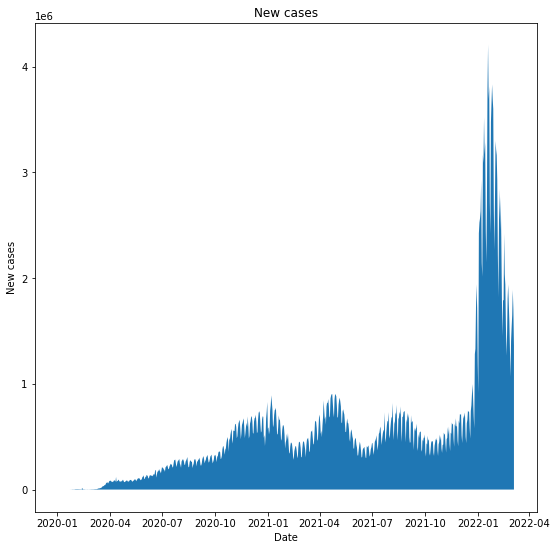

In [180]:
plt.figure(figsize=(9,9))
plt.fill_between(df3.index, df3.new_cases)
plt.title('New cases')
plt.xlabel('Date')
plt.ylabel('New cases')

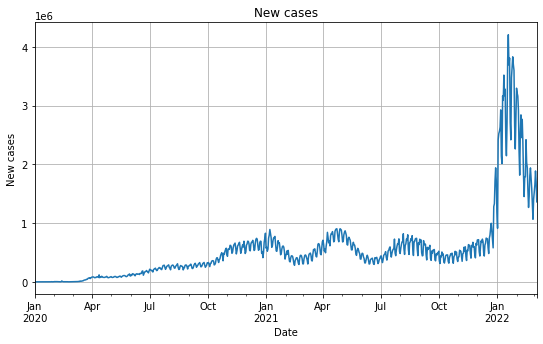

In [75]:
df3['new_cases'].plot(figsize=(9,5))
plt.title('New cases')
plt.xlabel('Date')
plt.ylabel('New cases')
plt.grid(True)


By this plot we can divide covid-19 from april 2020 to january 2022 in 4 phases, 1st phase being from april 2020 to feb 2021, this phase had 2 variants in which 2nd variant was much fatal as compare to the 1st one, we can notice more 2 phases of april 2021 to july 2021 and august 2021 to october 2021 these were short phases but had significant impact on spreading the virus, the latter phase being the weakest due to that everything was returning to normal this led to last and the most widespread wave among all where the peak cases per day were 4X times the peak cases noticed in any of the previous cases and as noticed in the previous section of statistical analysis the maximum number of cases per million noticed were around 7,00,000 was the period corresponding to this one.

Text(0, 0.5, 'no. of deaths')

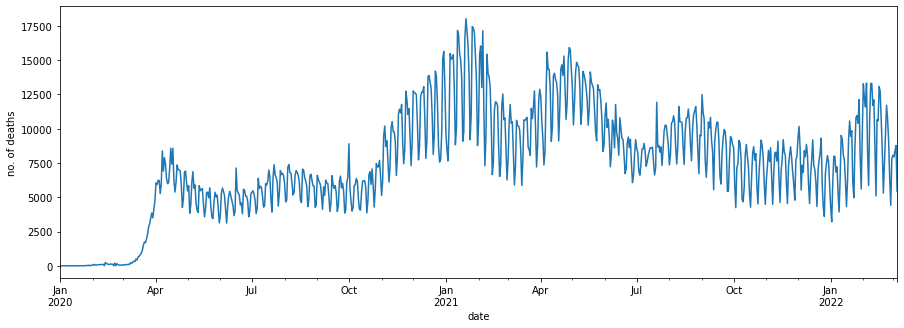

In [160]:
df3['new_deaths'].plot(figsize=(15,5))
plt.ylabel('no. of deaths')

The 4 phases can again be easily noticed in this plot of new deaths, We can infer that in terms of death the first 2 phases were quite fatal as compared to the last 2 phases. And the number of deaths dropped by a great amount if we compare the number of cases in 4th wave with the second wave. Again connecting this with the new cases plot we can notice that 2nd phases of jan 2021 was the most fatal and lethal one as the deaths peaked to more than 18,000 per day during this time, even though the new cases for 4th phase were 4 times the cases in 2nd phase it did not get as fatal as the 2nd phase, One of the explaination for this might be the huge amount of vaccination that was done before jan 2022 this is explored in the following sections.

Text(0, 0.5, 'no of cases')

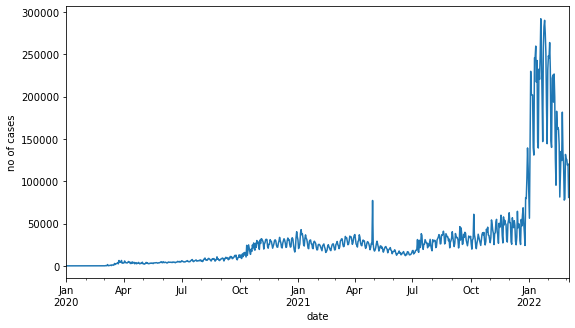

In [161]:
df3['new_cases_per_million'].plot(figsize=(9,5))
plt.ylabel('no of cases')

This plot is similar to the new cases plot in the previous plots.

Text(0, 0.5, 'no of tests in million')

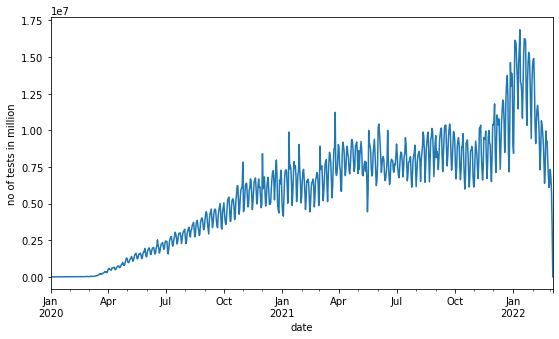

In [163]:
df3['new_tests'].plot(figsize=(9,5))
plt.ylabel('no of tests in million')

Text(0, 0.5, 'no of patients')

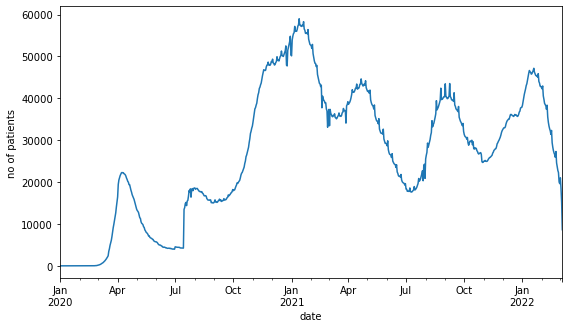

In [164]:
df3['icu_patients'].plot(figsize=(9,5))
plt.ylabel('no of patients')

Again this plot confirms our inference of 2nd phase being more fatal than the 4th one where the number of fatal cases or icu patients are much greater than any other phases, almost touching 60000.

Text(0, 0.5, 'no of patients')

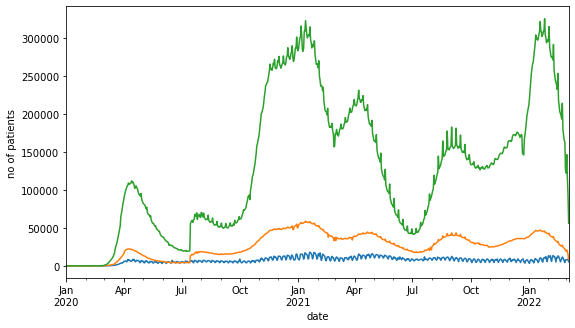

In [165]:
df3['new_deaths'].plot(figsize=(9,5))
df3['icu_patients'].plot(figsize=(9,5))
df3['hosp_patients'].plot(figsize=(9,5))
plt.ylabel('no of patients')

Text(0, 0.5, 'no of vaccinations')

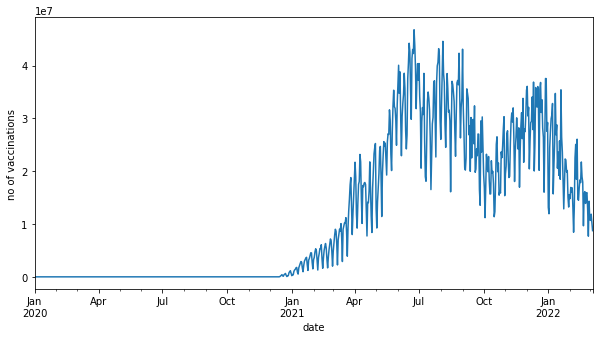

In [166]:
df3['new_vaccinations'].plot(figsize=(10,5))
plt.ylabel('no of vaccinations')

As deducted in the plot with new cases that the 4th phase was less fatal as compared to 2nd one can be explained easily using this plot. the vaccine being introduced in jan 2021,had no vaccination before for the 2nd phase hence it caused more death and was ore fatal,but the huge amounts of vaccinations in may to september 2021 can be explained as one of the reason for the 4th phase being less fatal as compared to others. Hence we can infer from above plot that vaccination was indeed more effective in controlling the fatality of the virus.

In [132]:
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [145]:
df4=df2[['total_cases', 'new_cases','total_deaths','new_deaths','icu_patients','hosp_patients','new_tests', 'total_tests','total_vaccinations','people_vaccinated', 'people_fully_vaccinated']]
df4.head()

,total_cases,new_cases,total_deaths,new_deaths,icu_patients,hosp_patients,new_tests,total_tests,total_vaccinations,people_vaccinated,people_fully_vaccinated
0,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [146]:
df4.tail()

,total_cases,new_cases,total_deaths,new_deaths,icu_patients,hosp_patients,new_tests,total_tests,total_vaccinations,people_vaccinated,people_fully_vaccinated
166321,236871.0,491.0,5395.0,0.0,NaN,NaN,NaN,NaN,7901360.0,4365856.0,3399915.0
166322,237503.0,632.0,5396.0,1.0,NaN,NaN,NaN,2085373.0,7910740.0,4368726.0,3402434.0
166323,237503.0,0.0,5396.0,0.0,NaN,NaN,NaN,NaN,7921113.0,4372925.0,3406482.0
166324,238739.0,1236.0,5397.0,1.0,NaN,NaN,NaN,2090217.0,7930621.0,4374896.0,3408609.0
166325,239019.0,280.0,5397.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [147]:
df4.corr()

,total_cases,new_cases,total_deaths,new_deaths,icu_patients,hosp_patients,new_tests,total_tests,total_vaccinations,people_vaccinated,people_fully_vaccinated
total_cases,1.000000,0.624506,0.921015,0.584776,0.746292,0.744325,0.765188,0.932791,0.340972,0.685550,0.598863
new_cases,0.624506,1.000000,0.542479,0.605468,0.635509,0.722059,0.656200,0.572476,0.161834,0.307765,0.294886
total_deaths,0.921015,0.542479,1.000000,0.624475,0.788974,0.767688,0.714181,0.821974,0.296090,0.607942,0.535992
new_deaths,0.584776,0.605468,0.624475,1.000000,0.856405,0.863539,0.599431,0.465877,0.121251,0.271984,0.218271
icu_patients,0.746292,0.635509,0.788974,0.856405,1.000000,0.959991,0.723365,0.691349,0.648255,0.669512,0.636473
hosp_patients,0.744325,0.722059,0.767688,0.863539,0.959991,1.000000,0.736543,0.693445,0.662165,0.666285,0.640375
new_tests,0.765188,0.656200,0.714181,0.599431,0.723365,0.736543,1.000000,0.836356,0.597172,0.593507,0.553405
total_tests,0.932791,0.572476,0.821974,0.465877,0.691349,0.693445,0.836356,1.000000,0.800803,0.776959,0.773689
total_vaccinations,0.340972,0.161834,0.296090,0.121251,0.648255,0.662165,0.597172,0.800803,1.000000,0.985090,0.988008
people_vaccinated,0.685550,0.307765,0.607942,0.271984,0.669512,0.666285,0.593507,0.776959,0.985090,1.000000,0.952896


<AxesSubplot:>

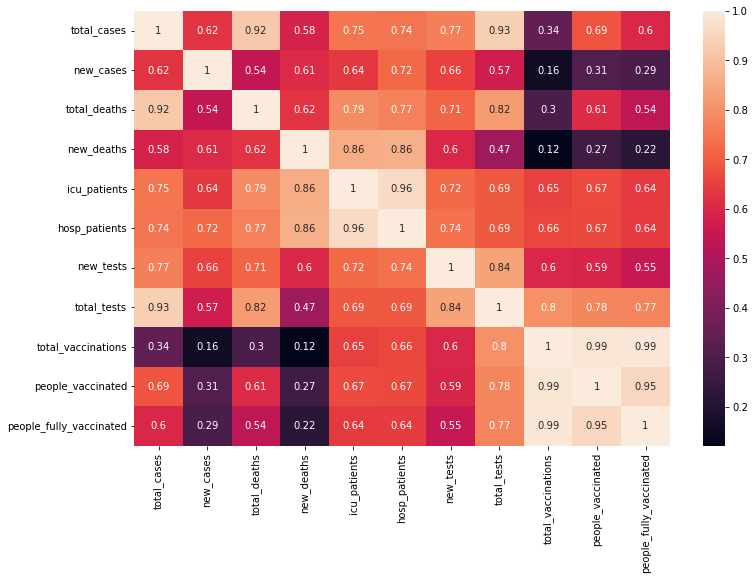

In [152]:
plt.figure(figsize=(12,8))
sns.heatmap(df4.corr(),annot=True)

There is a huge positive correlation between total cases and new tests of about 0.93 which shows that as the testing was increasing the total cases were simultaneously increasing, same for total_cases~new deaths =0.92 which again shows that more number of cases were increasing the deaths observed also increased.
Hospitalized patients have high correlation of 0.96 with icu patients shows how deadly this virus was, it proves that many patients hospitalized ended up in the ICU. also New_deaths have a high correlation with hospitalized patients it shows that many patients who were hosptailized and in ICU could not survive the virus.

New_cases & New_deaths has a less correlation (close to negative) with total vaccinations,0.16 and 0.12 respectively this clearly explains that as the vaccintions increased thoughout the world the total number of cases and fatalities dropped significantly, hence showing the effect of vaccinations on people and also proves that vaccinations were effective.


So, with the help of above plots we were able to notice relations between various fields and features of data and we were also able to verify them with the correlation heatmap, In the end we can conclude that vaccines were able to reduce fatalaties and effect of virus on humans manifold and save a lot of lives. Due to unavailability of proper healthcare infrastructure and vaccine lot of people lost their lives in the 2nd phase of covid-19, The 4th phase even though was more widespread throughout the world was mild and less fatal.

For future prediction of covid-19 or any other epidemic number of cases per day,tests performed,tests per patient ,hospitalized patients,ICU patients, availabilty of vaccines,total vaccinations are some of the major factors to be considered.